In [49]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [50]:
df_orig = pd.read_csv("./pokemon.csv", encoding="unicode_escape")

In [51]:
df_orig.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [52]:
# Exercise: pick a few types from the dataset for clustering
df_orig["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [53]:
mask = df_orig["Type 1"].isin(["Grass", "Fire", "Water"])
df = df_orig[mask]

In [54]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [55]:
df = df[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]

## Deploy KMeans Clustering


In [56]:
# Build the model with specific number of clusters
KM = KMeans(n_clusters=3, random_state=1)

In [57]:
# To help visualize clusters, we will only use 2 of the 7 features
df["Clusters"] = KM.fit_predict(df[["Attack", "Defense"]])

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
sil_val = silhouette_score(df.values, df['Clusters'].values)

In [71]:
sil_val

0.2178947381598023

In [59]:
# Define centroids
centroids = KM.cluster_centers_

In [60]:
# Split the list of centroid coordinates into X values and Y values
cen_X = list(centroids[:, 0])
cen_Y = list(centroids[:, 1])

In [61]:
# Add centroids coordinates to the df as columns
df["cen_X"] = df["Clusters"].map({0: cen_X[0], 1: cen_X[1], 2: cen_X[2]})
df["cen_Y"] = df["Clusters"].map({0: cen_Y[0], 1: cen_Y[1], 2: cen_Y[2]})

In [62]:
colors = ["#b4eb34", "#eb7434", "#0e6ae3"]
df["Colors"] = df["Clusters"].map({0: colors[0], 1: colors[1], 2: colors[2]})

In [63]:
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Clusters,cen_X,cen_Y,Colors
0,318,45,49,49,65,65,45,1,49.875000,48.075000,#eb7434
1,405,60,62,63,80,80,60,1,49.875000,48.075000,#eb7434
2,525,80,82,83,100,100,80,0,79.801887,74.386792,#b4eb34
3,625,80,100,123,122,120,80,2,112.270833,102.479167,#0e6ae3
4,309,39,52,43,60,50,65,1,49.875000,48.075000,#eb7434


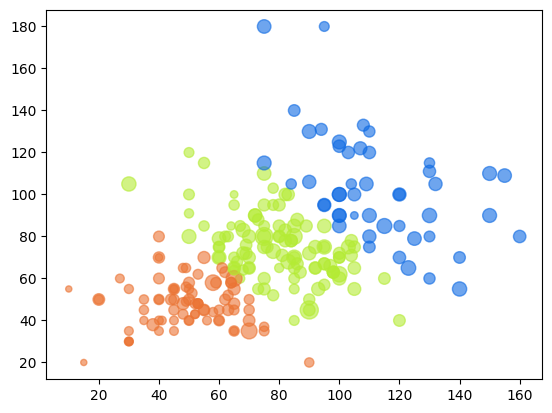

In [64]:
plt.scatter(x=df["Attack"], y=df["Defense"], c=df["Colors"], alpha=0.6, s=df["HP"])

Text(0, 0.5, 'Defense')

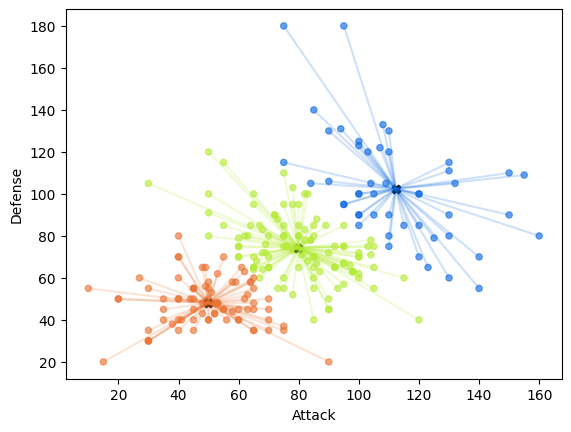

In [65]:
plt.scatter(x=df["Attack"], y=df["Defense"], c=df["Colors"], alpha=0.6, s=20)
plt.scatter(cen_X, cen_Y, c="black", marker="X")

for idx, val in df.iterrows():
  x = [val.Attack, val.cen_X]
  y = [val.Defense, val.cen_Y]
  plt.plot(x, y, c=val['Colors'], alpha=0.2)

plt.xlabel('Attack')
plt.ylabel('Defense')

## Choosing Number of Clusters Using The Elbow Method

In [66]:
df_bows = pd.read_csv('./Mall_customers.csv')

In [67]:
# df_sub = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df_sub = df_bows.iloc[:, [3,4]]
df_sub.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


The Elbow Method is a common algorithm to choose the optimal number of clusters (k)

1. Select a range of k values (usually start between 1-10)
2. Compute clustering for each k value
3. Calculate WCSS (Within-Cluster Sum of Squares)
4. Plot WCSS (inertia) vs. k (number of clusters)
5. Identify the Elbow Point (cutoff)


In [68]:
# Build a list of k values
k_values = range(1, 11)

# Build a list of WCSS calculations
wcss_list = []

for k in k_values:
  # Build a KMeans model based on each k value
  KM_model = KMeans(n_clusters=k)
  KM_model.fit(df_sub)

  # Calculate and append WCSS values
  wcss_value = KM_model.inertia_
  wcss_list.append(wcss_value)
  print(f'k value of: {k} | WCSS value: {wcss_value}')

k value of: 1 | WCSS value: 269981.28
k value of: 2 | WCSS value: 182440.30762987013
k value of: 3 | WCSS value: 106348.37306211118
k value of: 4 | WCSS value: 73679.78903948834
k value of: 5 | WCSS value: 44448.45544793371
k value of: 6 | WCSS value: 37233.814510710006
k value of: 7 | WCSS value: 30273.394312070042
k value of: 8 | WCSS value: 25018.576334776335
k value of: 9 | WCSS value: 21826.936303231654
k value of: 10 | WCSS value: 20165.786114970302


/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(5, 44448.45544793371, 'Optimal Value of K')

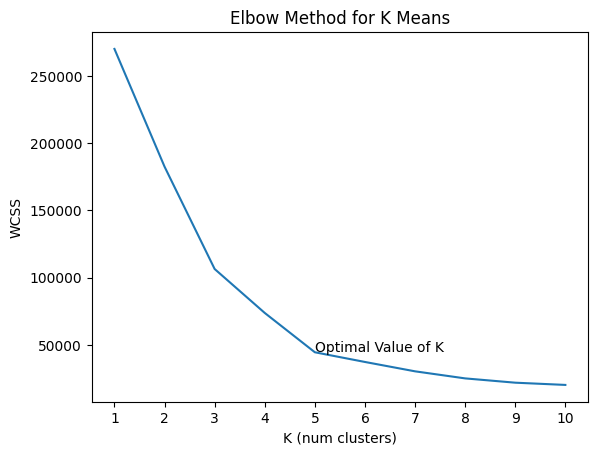

In [69]:
plt.plot(k_values, wcss_list)
plt.title('Elbow Method for K Means')
plt.xlabel('K (num clusters)')
plt.ylabel('WCSS')
plt.xticks(k_values)

plt.annotate('Optimal Value of K', xy=(k_values[4], wcss_list[4]))

We can see using the Elbow Method that 5 is the optimal number of clusters

# Hierarchical Clustering

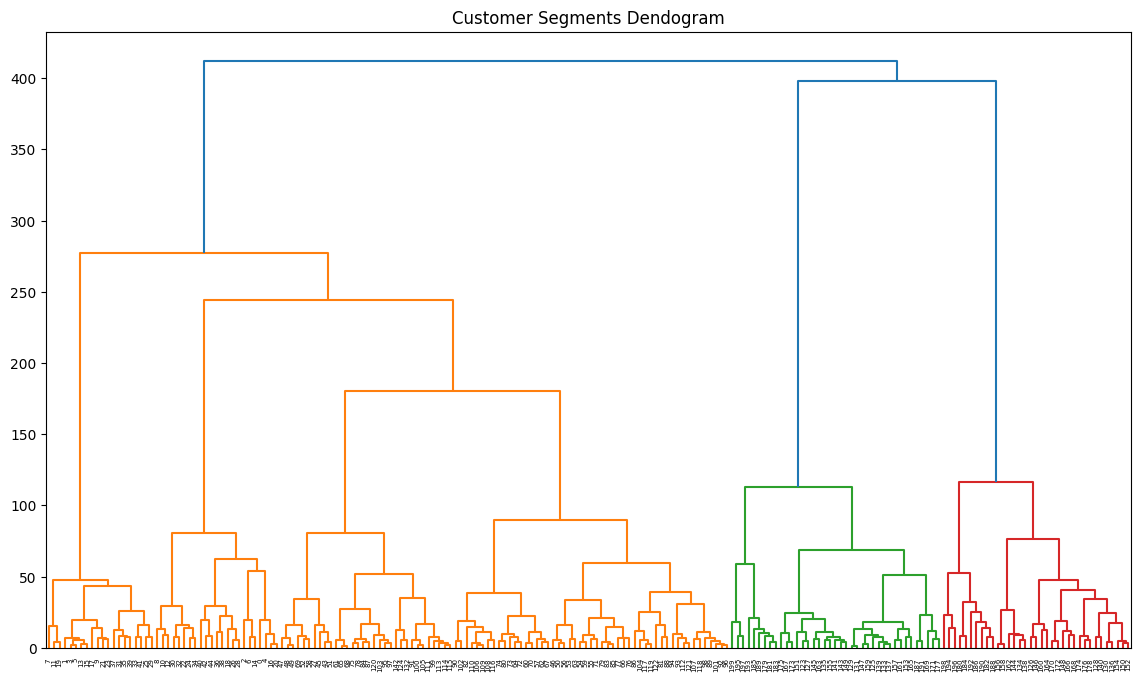

In [70]:

plt.figure(figsize=(14, 8))
plt.title('Customer Segments Dendogram')
HC = sch.linkage(df_bows[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], method='ward')
dendo = sch.dendrogram(HC)